# Agrupamento

In [12]:
import sys

import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.io as spio
import matplotlib.pyplot as plt

## Implementando o K-means

In [76]:
data = spio.loadmat("data/ex7data2.mat")
X = data['X']

In [42]:
def find_closest_centroids(X, centroids):
    m = len(X)
    K = np.size(centroids, 0)
    idx = np.zeros((len(X), 1), dtype=np.int8)
    for i in range(m):
        min_dist = sys.maxsize
        for j in range(K):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    return centroids

K = 3

def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = np.size(initial_centroids, 0)
    idx = np.zeros(m)
    centroids = initial_centroids
    for iter in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

## Encontrando centróides mais próximos

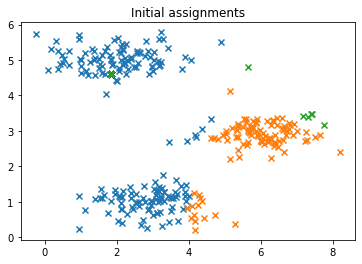

In [58]:
def find_closest_centroids(X, centroids):
    m, n = X.shape
    K = np.size(centroids, 0)
    idx = np.zeros((len(X), 1), dtype=np.int8)
    for i in range(m):
        min_dist = sys.maxsize
        for j in range(K):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Initial assignments')
plt.show()

In [110]:
def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        indices = np.where(idx == i)[0]
        centroids[i,:] = sum(X[indices,:]) / len(indices)
    return centroids

print('Cluster assignments for the first, second and third examples: ' + str(idx[0:3].flatten()))

# Compute initial means
initial_centroids = compute_centroids(X, idx, 3)
print(initial_centroids)

# Now run 10 iterations of K-means on fixed seeds
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
#initial_centroids = kmeans_init_centroids(X, K)
#max_iters = 10
#centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=False)
#print('Centroids after the 1st update:\n' + str(centroids))

Cluster assignments for the first, second and third examples: [0 2 1]
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


Centroids after the 1st update:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


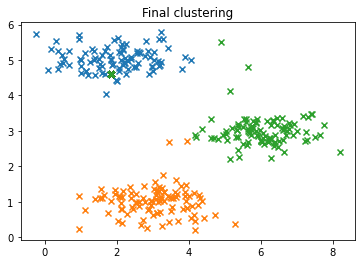

In [112]:
def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = X.shape
    K = np.size(initial_centroids, 0)
    idx = np.zeros(m)
    centroids = initial_centroids
    for iter in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters)
print('Centroids after the 1st update:\n' + str(centroids))

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Final clustering')
plt.show()

## Inicialização aleatória

[[5.89562099 2.89843977]
 [4.88804332 5.50670795]
 [6.99198434 2.98706729]]
Centroids after the 1st update:
[[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]


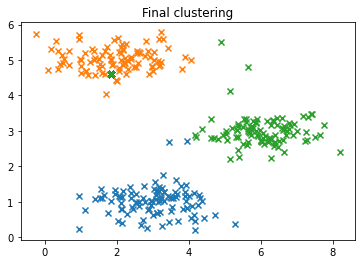

In [114]:
def kmeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

initial_centroids = kmeans_init_centroids(X, K)
print(initial_centroids)

max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=False)
print('Centroids after the 1st update:\n' + str(centroids))

plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
plt.title('Final clustering')
plt.show()